# FIT5196 Assessment 1
#### Student Name: DISHI JAIN
#### Student ID: 30759307


Libraries used:
* library(psych) (for describe function)
* library(ggplot2) (for plotting graphs)
* library(reshape2) (for plotting graphs)
* library(gridExtra) (for plotting graphs on a grid)
* library(GGally) (for ggpairs function)
* library(lattice) (for levelplot)
* library(glmnet) (for glmnet in lasso and ridge)
* library(car) (for outlierTest)

## 1. Libraries Loaded

In [1]:
library(psych)
library(ggplot2)
library(reshape2)
library(gridExtra) 
library(GGally)
library(lattice)
library(glmnet)
library(car)
library(leaps)


Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

Warning message:
"package 'leaps' was built under R version 3.6.3"

## 2. DATA EXPLORATION

- Reading datasets

In [2]:
#reading datasets
data_test <- read.csv("test.csv",header=T)
data_train <- read.csv("train.csv",header=T)

- Finding dimensions of test dataset

In [3]:
#finding dimesnons of datasets
dim(data_test)

[1] 1752   14

This tells us that the test data has 1752 records and 14 columns)

- Finding dimensions of train dataset

In [4]:
dim(data_train)

[1] 7008   14

This tells us that the trainng data has 7008 records and 14 columns)

- Taking a look at top rows of test dataset

In [5]:
head(data_test)

Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
1/12/17,360,11,-0.5,21,1.3,1936,-20.2,0.94,0,0,Winter,No Holiday,Yes
1/12/17,862,18,0.6,66,1.4,2000,-5.0,0.00,0,0,Winter,No Holiday,Yes
1/12/17,323,23,-1.3,84,1.0,1265,-3.6,0.00,0,0,Winter,No Holiday,Yes
2/12/17,89,4,-3.8,79,2.0,1167,-6.9,0.00,0,0,Winter,No Holiday,Yes
2/12/17,219,8,-4.2,79,2.1,1436,-7.3,0.01,0,0,Winter,No Holiday,Yes
2/12/17,479,12,4.3,41,1.3,1666,-7.8,1.09,0,0,Winter,No Holiday,Yes


- Taking a look at top rows of train dataset

In [6]:
head(data_train)

Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


In [7]:
#combining the two datasets to get one whole dataset
data <- rbind(data_train, data_test) # join


Hence, we get a new dataset called data that is a combination of training and test data

- Taking a look at top rows of entire dataset

In [8]:
head(data)

Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


- Finding dimensions of entire dataset

In [9]:
dim(data)

[1] 8760   14

This tells us that the data has 8760 records and 14 columns)

In [10]:
str(data)

'data.frame':	8760 obs. of  14 variables:
 $ Date                 : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday              : Factor w/ 2 levels "Holiday"

It is known to us that there are no null values present in our dataset. 

From the str() we can see each column's type and the kind of values it contains. We know the following things about the given columns - 

**Date** : year-month-day

**Rented Bike count** : Count of bikes rented at each hour, the response variable 

**Hour** : Hour of the day

**Temperature** : Temperature in Celsius

**Humidity** : in %

**Windspeed** : m/s

**Visibility** : 10m

**Dew point temperature** : Celsius

**Solar radiation** : MJ/m2

**Rainfall** : mm

**Snowfall** : cm

**Seasons** : Winter, Spring, Summer, Autumn

**Holiday** : Holiday/No holiday, indicating if the corresponding date is a public holiday or not

**Functional Day** : NoFunc(Non Functional Hours), Fun(Functional hours), the variable indicates the days when the rental bike system does not operate.


Also known to us is that our target variable is Rented.Bike.Count

We need to find how the other columns/predictors affect this target variable

Now to find some interesting observations in our dataset, we will use the summay() to get matrices like max, min, mean, median, etc. 

In [11]:
summary(data)

      Date      Rented.Bike.Count      Hour        Temperature    
 1/1/18 :  24   Min.   :   0.0    Min.   : 0.00   Min.   :-17.80  
 1/10/18:  24   1st Qu.: 191.0    1st Qu.: 5.75   1st Qu.:  3.50  
 1/11/18:  24   Median : 504.5    Median :11.50   Median : 13.70  
 1/12/17:  24   Mean   : 704.6    Mean   :11.50   Mean   : 12.88  
 1/2/18 :  24   3rd Qu.:1065.2    3rd Qu.:17.25   3rd Qu.: 22.50  
 1/3/18 :  24   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
 (Other):8616                                                     
    Humidity       Wind.speed      Visibility   Dew.point.temperature
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.400   Max.   :200

To get a more detailed analysis for each column we'll use the describe() on the data

In [12]:
round(describe(data,3))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Date*,1,8760,183,105,183,183,135,1,365,364,0,-1,1
Rented.Bike.Count,2,8760,705,645,504,613,554,0,3556,3556,1,1,7
Hour,3,8760,12,7,12,12,9,0,23,23,0,-1,0
Temperature,4,8760,13,12,14,13,14,-18,39,57,0,-1,0
Humidity,5,8760,58,20,57,58,24,0,98,98,0,-1,0
Wind.speed,6,8760,2,1,2,2,1,0,7,7,1,1,0
Visibility,7,8760,1437,608,1698,1509,448,27,2000,1973,-1,-1,6
Dew.point.temperature,8,8760,4,13,5,5,14,-31,27,58,0,-1,0
Solar.Radiation,9,8760,1,1,0,0,0,0,4,4,2,1,0
Rainfall,10,8760,0,1,0,0,0,0,35,35,15,285,0


* We see that Rented.Bike.Count and Visibility have very high ranges as compared to the other predictors
* We see that Temperature has a minimum value of -18 degree celcius and a maximum value of 39 degree celcius. Hence we can say that even at such extreme temperatures, bikes are rented.
* We can see that Rented.Bike.Count has the maximum standard deviation and even the maximum standard error.
* We can see that Visibility has the maximum mean and median
* We can see that * indicates the categorical/factor variables which are the Dates, Seasons, Holiday, Functioning.Day
* Mean Absolute Deviation tells us how far “on average” the observations are from the mean. The maximum MAD is observed for Rented.Bike.Count
* Standard error of the mean is seen maximum for Rented.Bike.Count

Now generating boxplot for the entire dataset

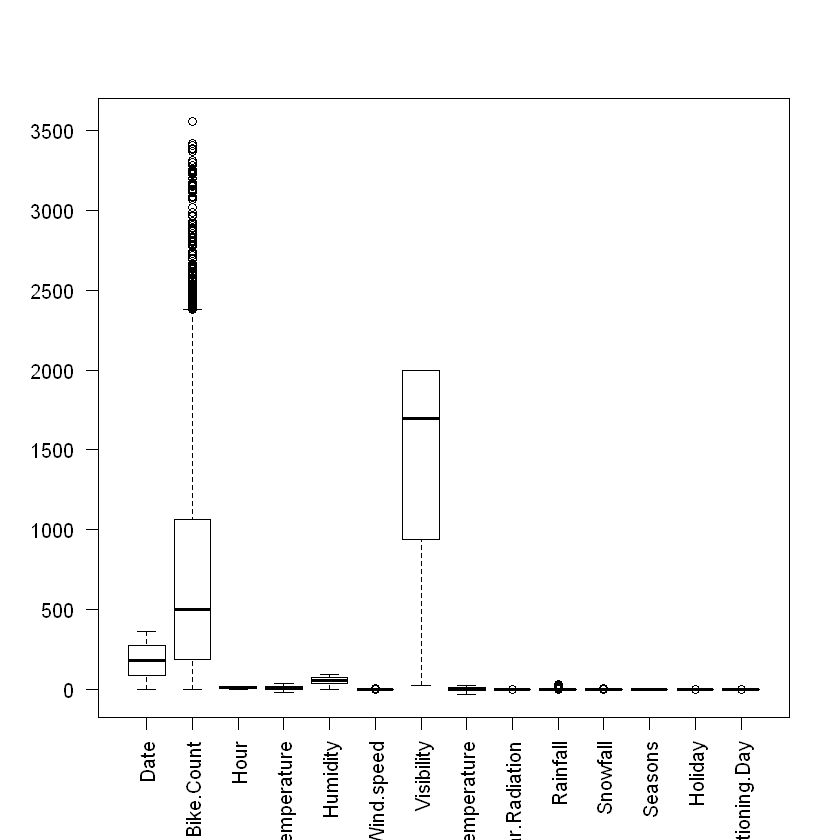

In [13]:
boxplot(data, las=2, cex.axis = 1)

As above doesn't display nicely, so we plot a boxplot for each column

Using Date, Seasons, Holiday, Functioning.Day as id variables


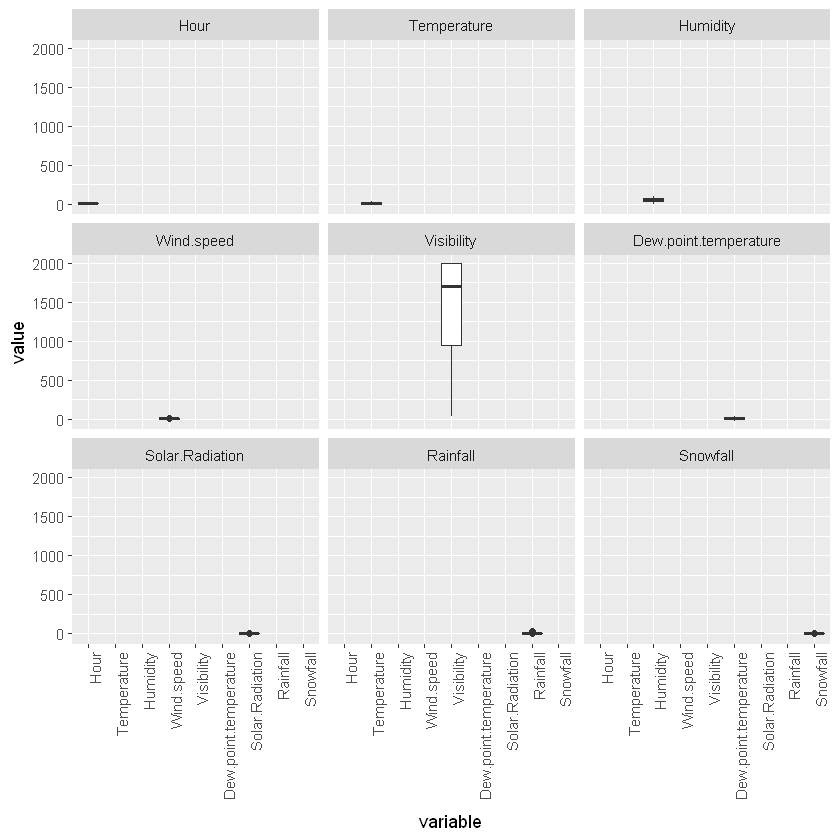

In [14]:
# ggplot to create graphs

melted_data <- melt(as.data.frame(data[,-2]))
ggplot(melted_data,aes(x = variable,y = value)) + 
  facet_wrap(~variable) + 
  geom_boxplot()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
                      

From the above figure we get to see that Visibility has a very high range and hence only it's boxplot is clearly visible above. The rest of the columns do not have much outliers

However for the categorical coluns we do not generate a boxplot

Next we generate graphs for each column in respect with each other column. This will help us to see correlation relationships between each column/predictor. This will help us to determine how each column is related to one another. 

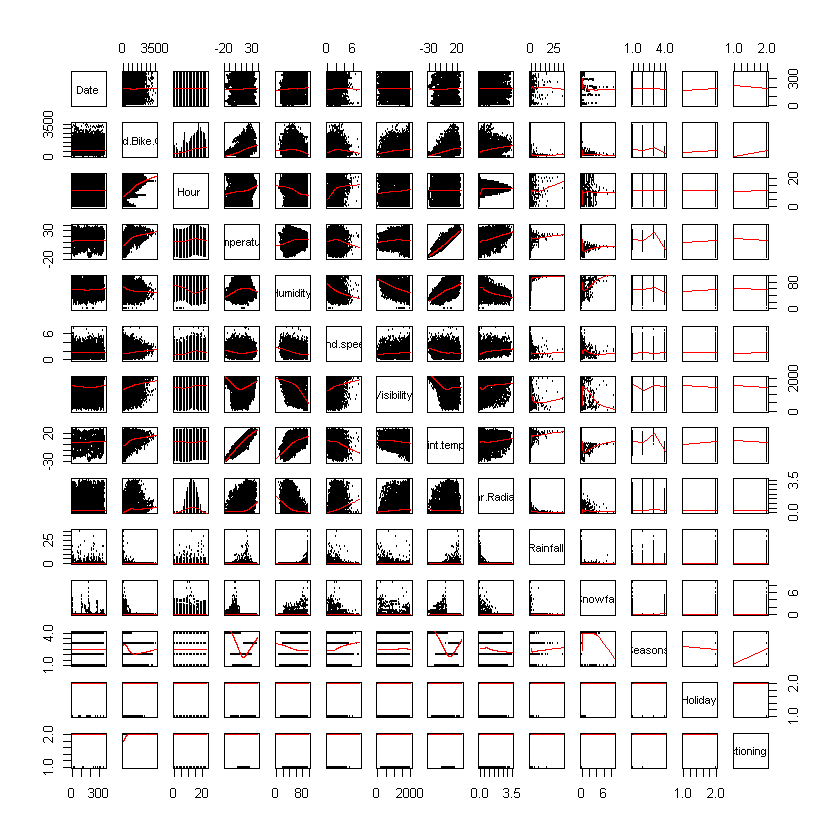

In [15]:
#to determine corelation relationship between all columns
pairs(data, panel = panel.smooth,cex = 0.2)

From the above figure we can see that Rented.Bike.Count has a positive corelation with Temperature and Visibility. Temperature and Snowfall have a negative corelation while Temperature and Dew.point.temperature have a positive corelation. Humidity has a negative corelation with Visibility and Solar Radiation while it has a positive corelation with Dew.point.temperature

Visibility and Humidity show a negative corelation while visiblity with wind speed shows a positive corelation. We can also see that hour and solar radiation do not show any corelation as can be seen by the horizontal line.

Now plotting histograms for each predictor to see how they are distributed. Histograms will also help to find the skewness in the data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


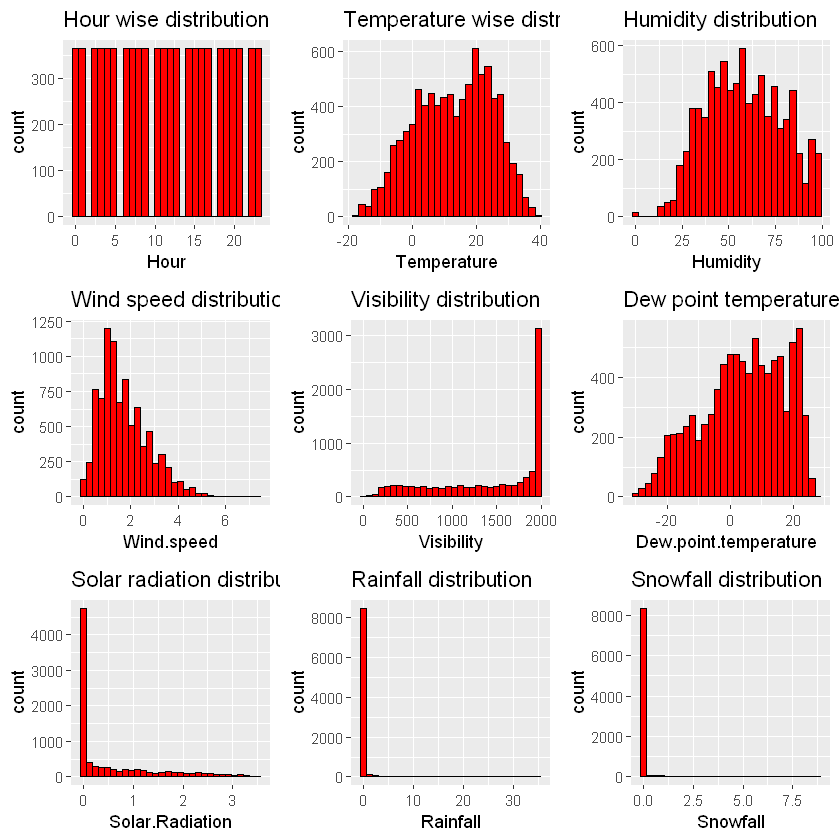

In [16]:
#plotting histograms for each column to see its distribution
p1<-ggplot(aes(x=Hour), data =  data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('Hour wise distribution')

p2<-ggplot(aes(x=Temperature), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Temperature wise distribution')

p3<-ggplot(aes(x=Humidity), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Humidity distribution')

p4<-ggplot(aes(x=Wind.speed), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Wind speed distribution')

p5<-ggplot(aes(x=Visibility), data =  data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('Visibility distribution')

p6<-ggplot(aes(x=Dew.point.temperature), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Dew point temperature  distribution')

p7<-ggplot(aes(x=Solar.Radiation), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Solar radiation distribution')

p8<-ggplot(aes(x=Rainfall), data =  data) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Rainfall distribution')

p9<-ggplot(aes(x=Snowfall), data =  data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('Snowfall distribution')


# plot all 9, 3 x 3

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol = 3)

From the above histograms we can see that- 

* Hour is almost evenly distributed.
* Temperature doesn't exhibit any skewness hence we can say that it is normally distributed.
* Humidity has almost an equal distribution of its data.
* Wind speed is right skewed hence we can say that with right-skewed distribution (also known as "positively skewed" distribution), most data falls to the right, or positive side, of the graph's peak. Thus, the histogram skews in such a way that its right side (or "tail") is longer than its left side.
* Visibility is left skewed hence most of the data points lie on the left side
* Dew point temperature is almost normally skewed. 
* Rest of the columns i.e. Solar radiation, Rainfall and Snowfall are right skewed graphs.

Now to see how the categorical variables are playing a part we will plot bar charts

To see how each season is contributing date wise we will plot a bar chart that shows the count of each season occurence

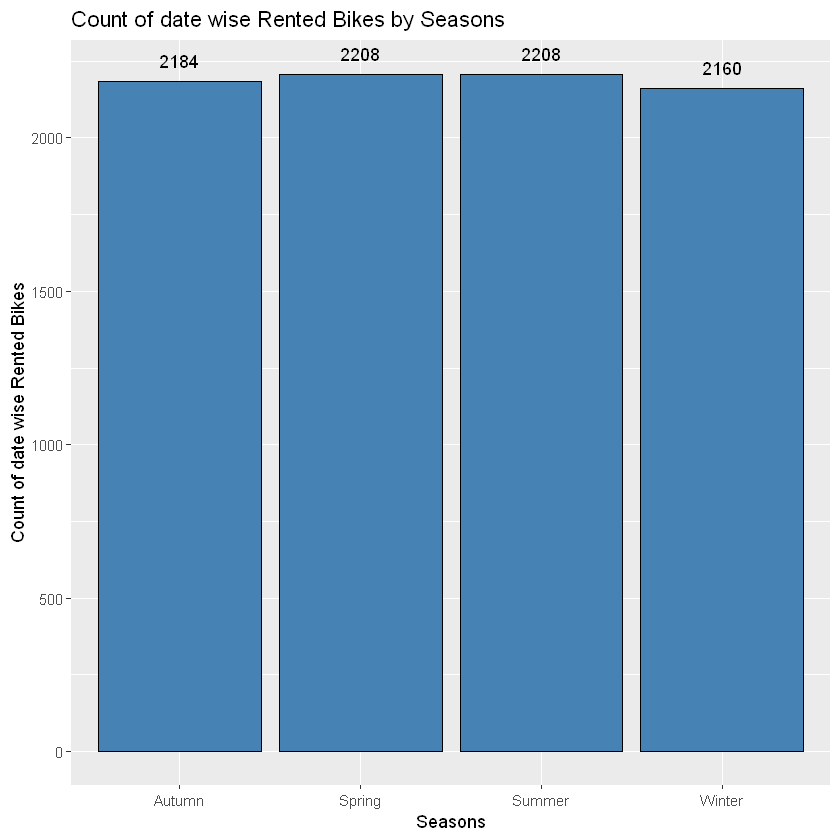

In [17]:
#count of rows for seasons
season_plot_count <- ggplot(data, aes(x = as.factor(Seasons))) + geom_bar(color="black",fill="steelblue")+
geom_text(stat='count',aes(label=..count..),vjust=-1) +
ggtitle("Count of date wise Rented Bikes by Seasons") +
xlab("Seasons") + ylab("Count of date wise Rented Bikes")
#Show the plot
season_plot_count

From the above bar chart we see that in all the season i.e. Autumn, Spring, Summer, Winter, the bikes are rented almost in the sme frequency


Now lets plot a bar chart that displays sum of bikes rented for each season

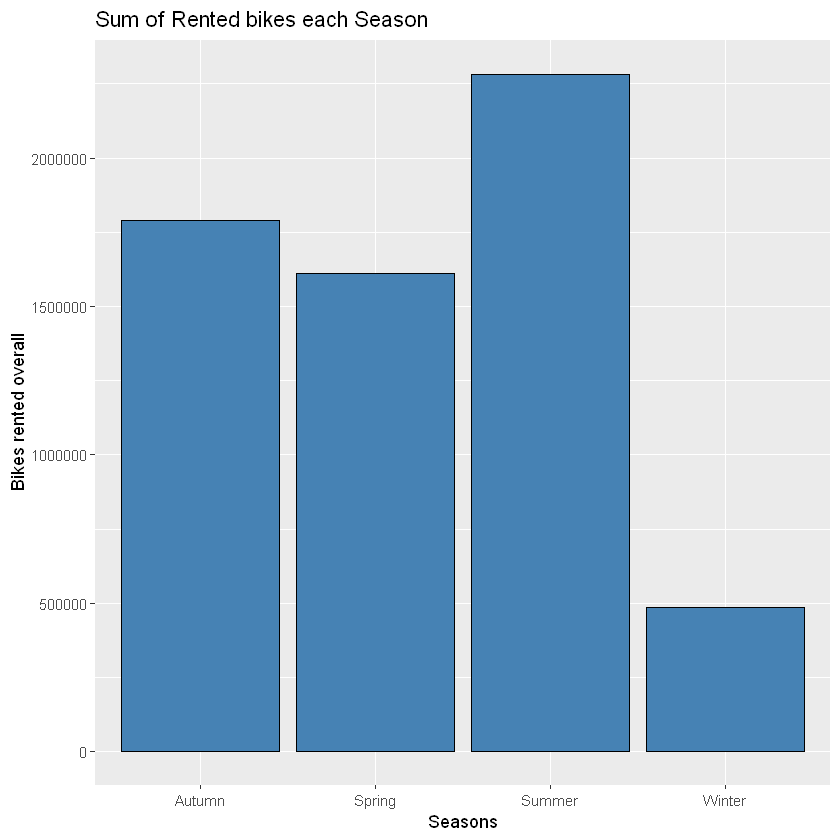

In [18]:
#sum of rented bikes for seasons
sum_by_season <- aggregate(Rented.Bike.Count ~ Seasons, data = data, FUN = sum)
seasons_plot_sum <- ggplot(sum_by_season, aes(x = Seasons, y = Rented.Bike.Count))+
                geom_bar(stat = 'identity',color="black",fill="steelblue") + ggtitle("Sum of Rented bikes each Season") +
                xlab("Seasons") + ylab("Bikes rented overall")
#Show the plot
seasons_plot_sum

From the above bar chart we can see that the most bikes are rented in the month of Summer. Hence we can say that during summers there is a higher chance of bike renting. Also from the above bar chart we can see that during Winters the least number of bikes are rented. This observation can be used by the bike sharing system to accordingly arrange for bikes during the winter season.


Now, to see how the Holiday column is contributing date wise we will plot a bar chart that shows the count of each Holiday value occurence

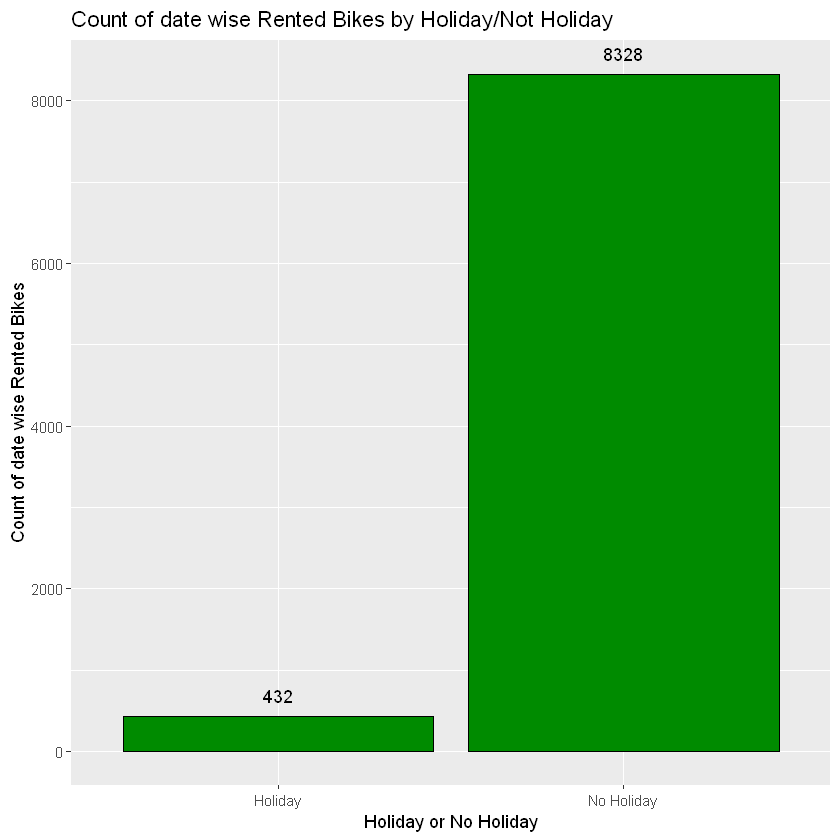

In [19]:
#count of rows for holidays
holiday_plot_count <- ggplot(data, aes(x = as.factor(Holiday))) + geom_bar(color="black",fill="green4")+
geom_text(stat='count',aes(label=..count..),vjust=-1) +
ggtitle("Count of date wise Rented Bikes by Holiday/Not Holiday") +
xlab("Holiday or No Holiday") + ylab("Count of date wise Rented Bikes")
#Show the plot
holiday_plot_count

From the above bar chart we see that during public Holidays we see a very less count of bikes rented and during normal days i.e. not a public holiday there is a huge count in bike rentals date wise.


Now lets plot a bar chart that displays sum of bikes rented for each Holiday value

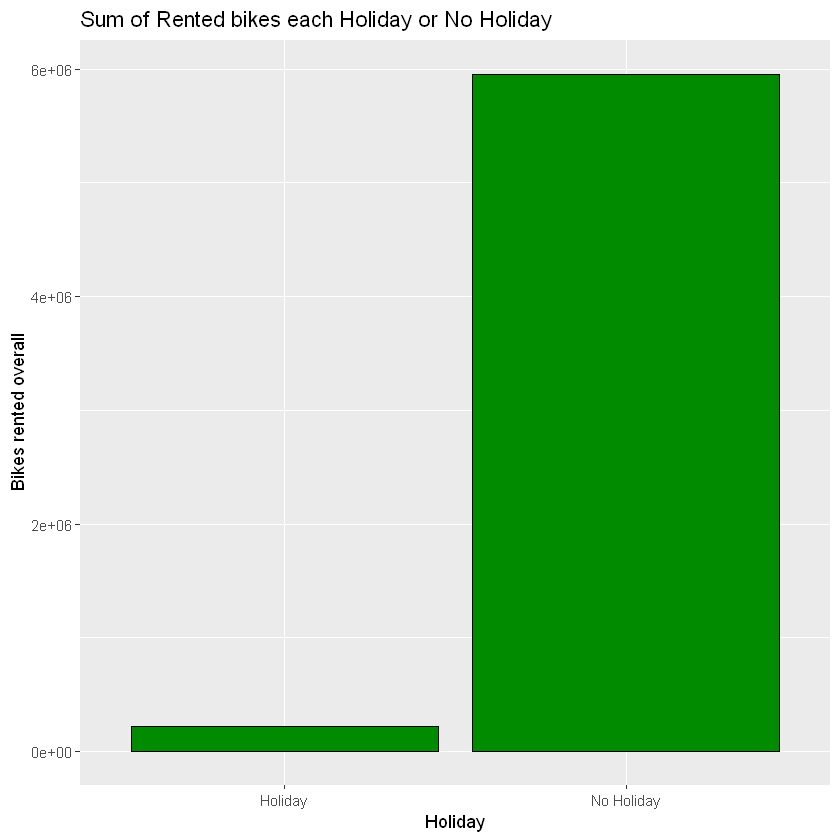

In [20]:
#sum of rented bikes for holidays
sum_by_holiday <- aggregate(Rented.Bike.Count ~ Holiday, data = data, FUN = sum)
holiday_plot_sum <- ggplot(sum_by_holiday, aes(x = Holiday, y = Rented.Bike.Count))+
                geom_bar(stat = 'identity',color="black",fill="green4") + ggtitle("Sum of Rented bikes each Holiday or No Holiday") +
                xlab("Holiday") + ylab("Bikes rented overall")
#Show the plot
holiday_plot_sum

From the above bar chart we can see that the most bikes are rented during normal days i.e. not a public holiday. Hence we can say that during normal days there is a higher chance of bike renting. Also from the above bar chart we can see that during holidays the least number of bikes are rented. This observation can be used by the bike sharing system to accordingly arrange for bikes during the holidays season.


Now, to see how the Functioning.Day column is contributing date wise we will plot a bar chart that shows the count of each FunctioningDay value occurence

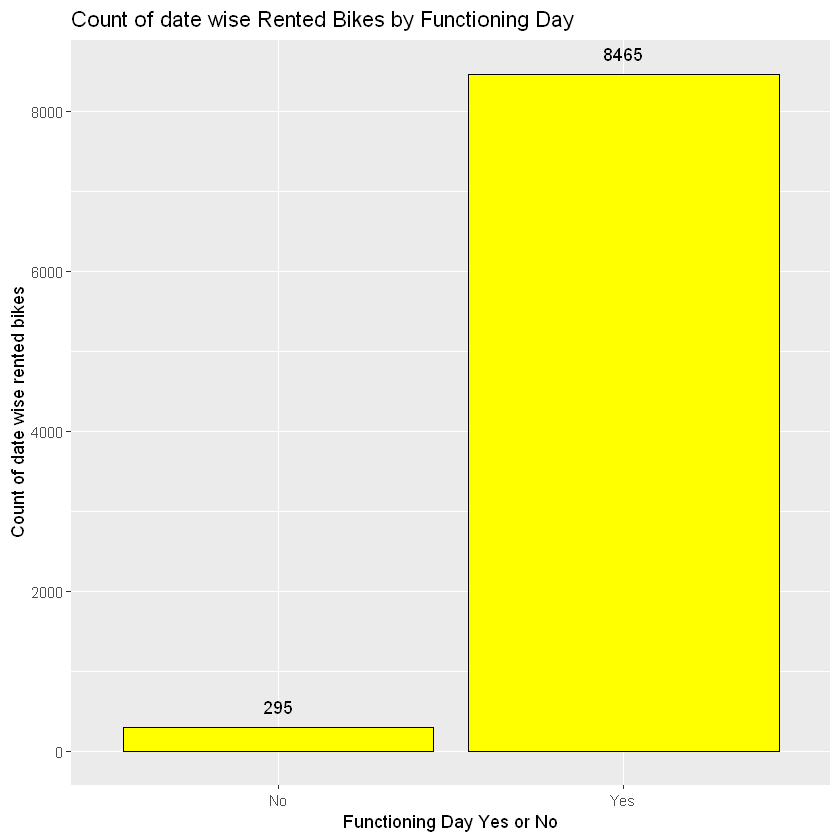

In [21]:
#count of rows for functioning day yes or no
functioningday_plot_count <- ggplot(data, aes(x = as.factor(Functioning.Day))) + geom_bar(color="black",fill="yellow")+
geom_text(stat='count',aes(label=..count..),vjust=-1) +
ggtitle("Count of date wise Rented Bikes by Functioning Day") +
xlab("Functioning Day Yes or No") + ylab("Count of date wise rented bikes")
#Show the plot
functioningday_plot_count

From the above bar chart we see that when the bike sharing system is not functioning we see a very less number of records in the data. This does not indicate tht bikes were rented or not during these dates.


Now lets plot a bar chart that displays sum of bikes rented for each Functioning Day value

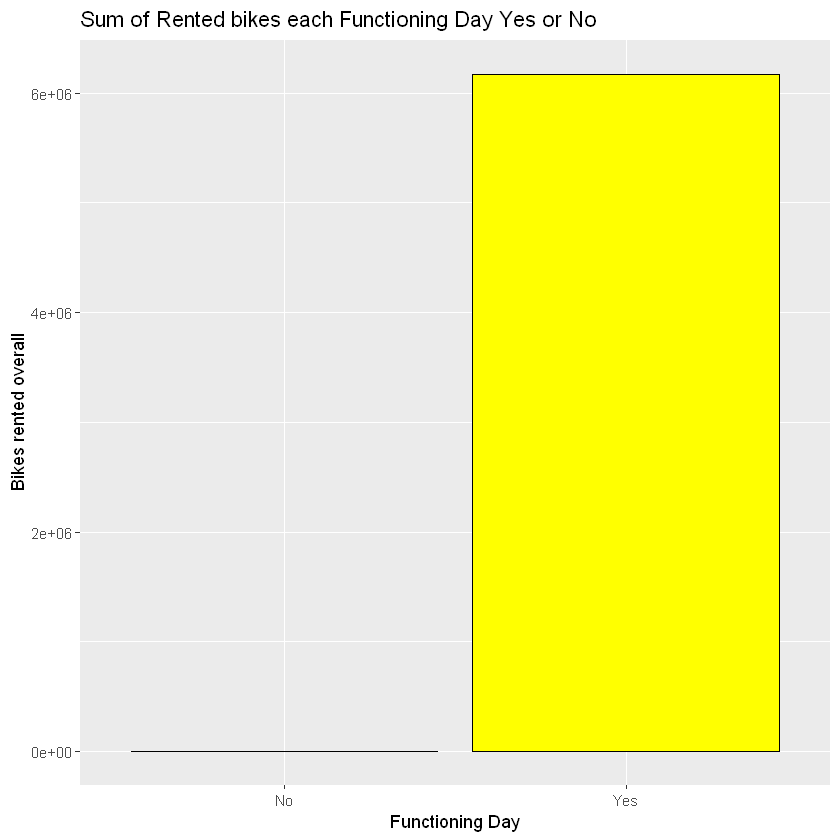

In [22]:
#sum of rented bikes for holidays

sum_by_functioning.day <- aggregate(Rented.Bike.Count ~ Functioning.Day, data = data, FUN = sum)
functioning.day_plot_sum <- ggplot(sum_by_functioning.day, aes(x = Functioning.Day, y = Rented.Bike.Count))+
                geom_bar(stat = 'identity',color="black",fill="yellow") + ggtitle("Sum of Rented bikes each Functioning Day Yes or No") +
                xlab("Functioning Day") + ylab("Bikes rented overall")
#Show the plot
functioning.day_plot_sum

From the above bar chart we can see that the bikes are rented during functining days only. This chart can be used to detect is there are any defaults in the data. However as 0 bikes are rented in Not Functioing days hence we can see that the data is correct.

Hence when bike systesm functionng is No, then sum of rented bikes is 0 as no bikes are rented

To see a much more detailed relationship between the variables, we can do the followin

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

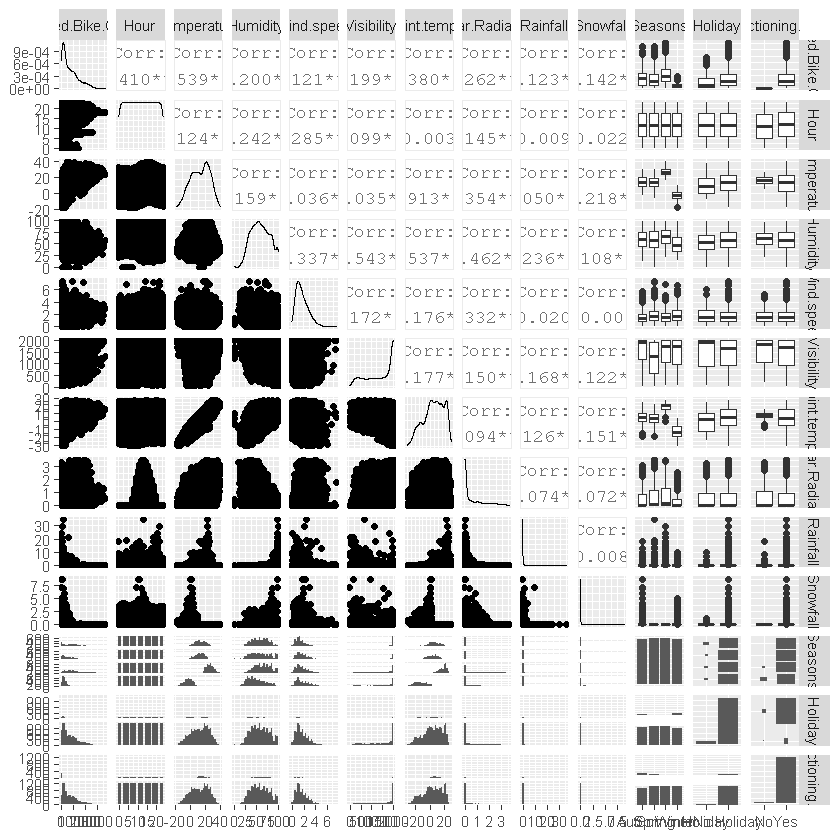

In [23]:
ggpairs(data[-1])

To get the correlation as numbers we plot a levelplot on our data

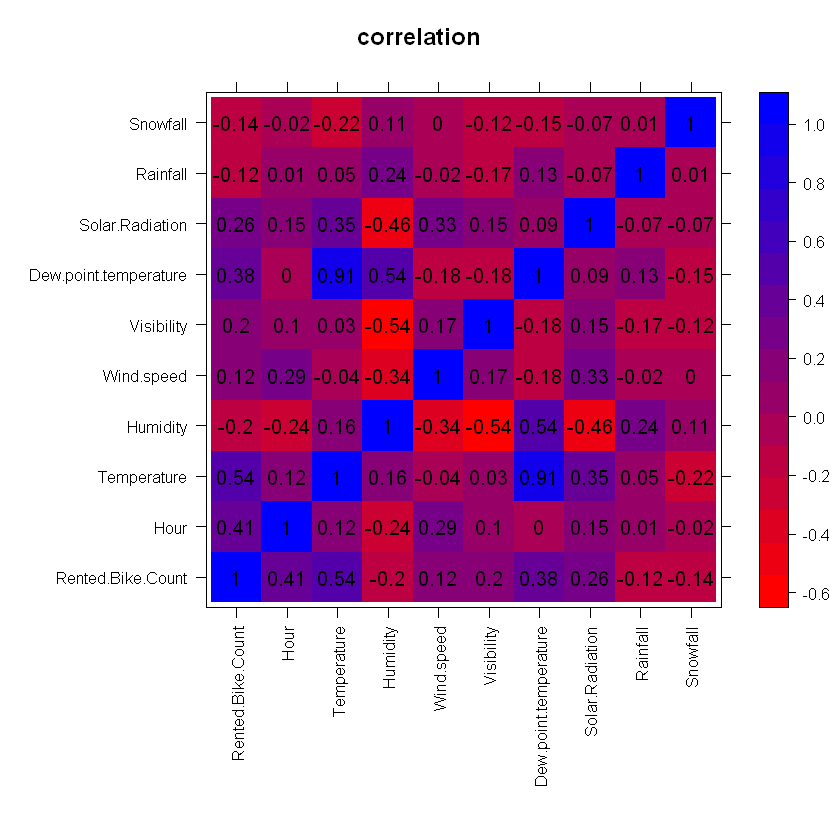

In [24]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("red","blue"))
#Plot the correlation matrix.
levelplot(cor(data[2:11]), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

From the above figure, we can clearly see positive and negative correlations between the columns. A positive number indicates a positive corelation whereas a negative number indicates a negative corelation

Now to see how each variable is distributed we will plot the histogram of each variable. However we should also compare its distribution with the distribution of its sqrt and log. 

Hence now for each column, we will plot the histogram of the column, the histogram of square root of column and the log of the column. This will help us to determine the distribution and hence will help in a better selection of the variable

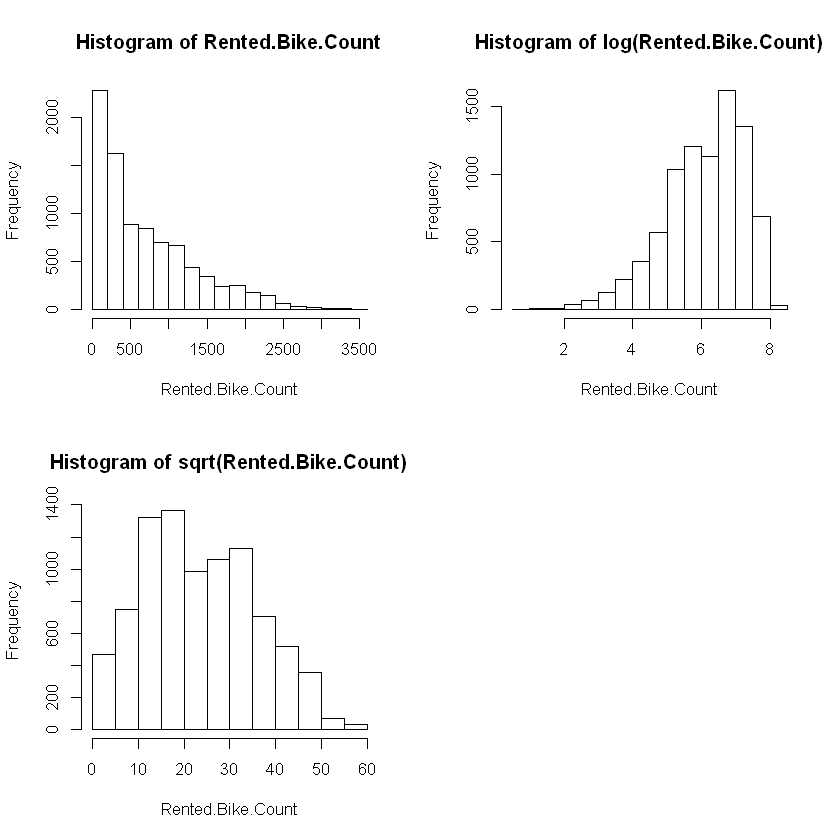

In [25]:
#variations of rented bikes
par(mfrow = c(2,2))
hist(data$Rented.Bike.Count, xlab = "Rented.Bike.Count", main="Histogram of Rented.Bike.Count")
hist(log(data$Rented.Bike.Count), xlab = "Rented.Bike.Count", main="Histogram of log(Rented.Bike.Count)")
hist(sqrt(data$Rented.Bike.Count), xlab = "Rented.Bike.Count", main="Histogram of sqrt(Rented.Bike.Count)")


From the above figure we can see that sqrt(Rented.Bike.Count) is the most normally distributed

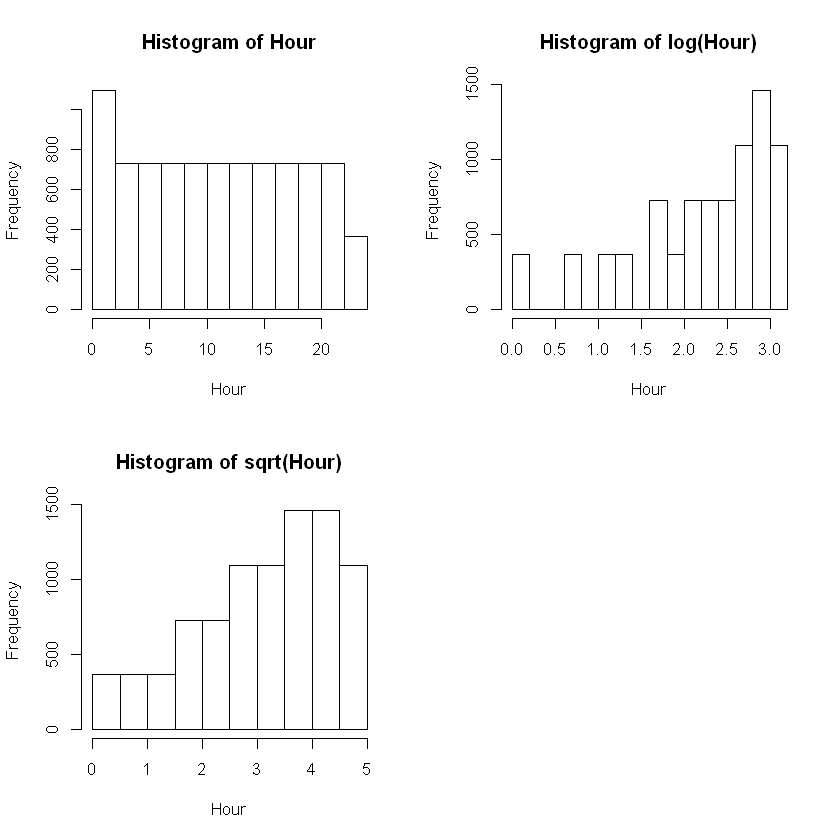

In [26]:
#variations of Hour
par(mfrow = c(2,2))
hist(data$Hour, xlab = "Hour", main="Histogram of Hour")
hist(log(data$Hour), xlab = "Hour", main="Histogram of log(Hour)")
hist(sqrt(data$Hour), xlab = "Hour", main="Histogram of sqrt(Hour)")


From the above figure we can see that the hour column itself is the most normally distributed

Warning message in log(data$Temperature):
"NaNs produced"Warning message in sqrt(data$Temperature):
"NaNs produced"

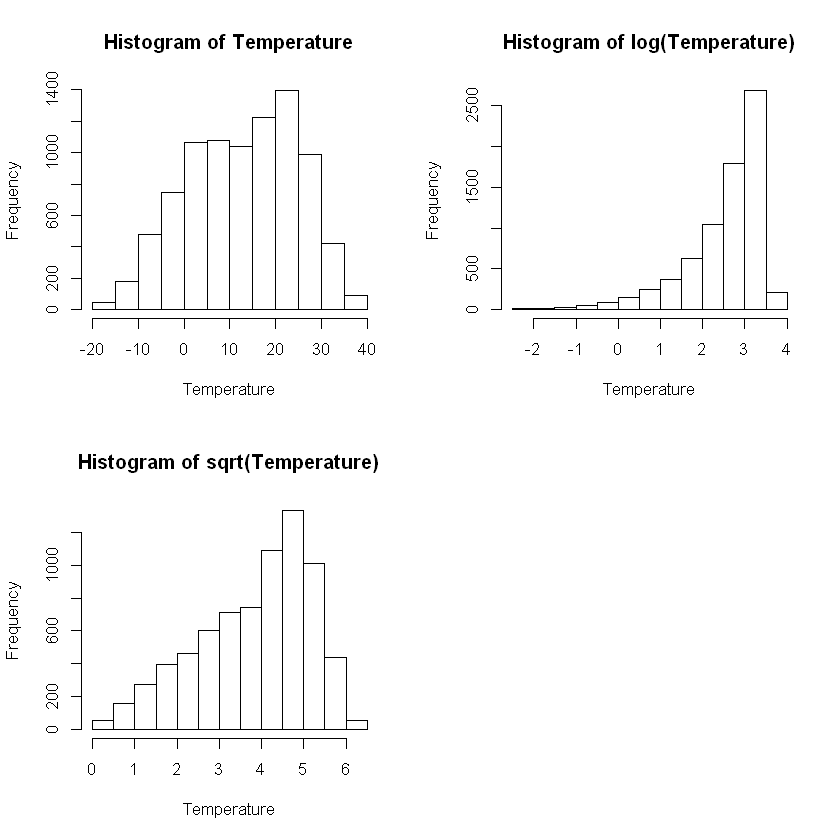

In [27]:
#variations of Temperature
par(mfrow = c(2,2))
hist(data$Temperature, xlab = "Temperature", main="Histogram of Temperature")
hist(log(data$Temperature), xlab = "Temperature", main="Histogram of log(Temperature)")
hist(sqrt(data$Temperature), xlab = "Temperature", main="Histogram of sqrt(Temperature)")


From the above figure we can see that the temperature column itself is the most normally distributed

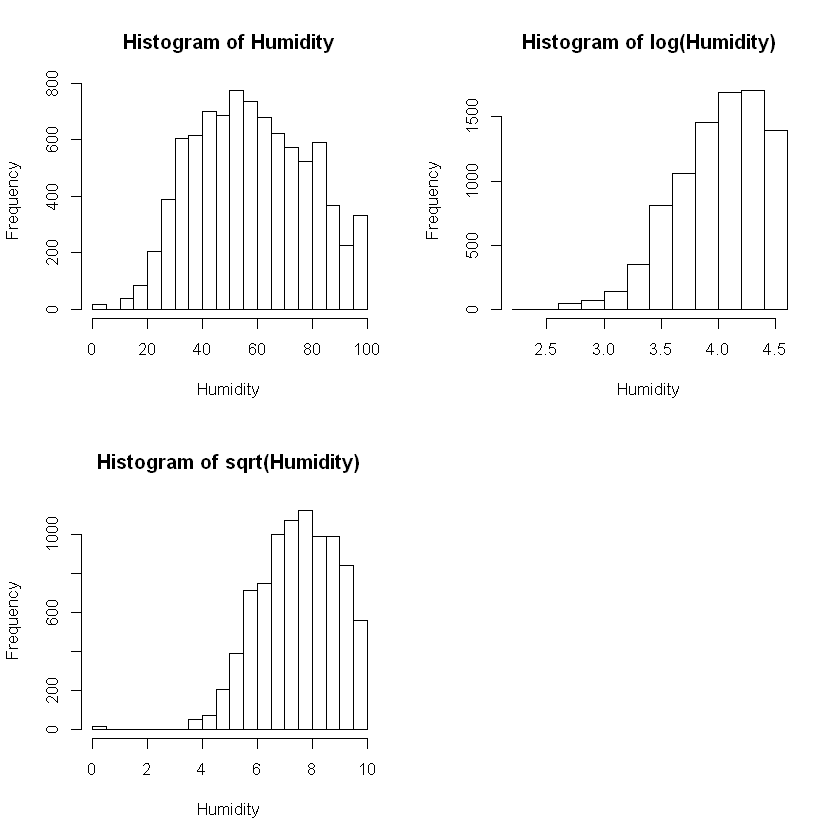

In [28]:
#variations of Humidity
par(mfrow = c(2,2))
hist(data$Humidity, xlab = "Humidity", main="Histogram of Humidity")
hist(log(data$Humidity), xlab = "Humidity", main="Histogram of log(Humidity)")
hist(sqrt(data$Humidity), xlab = "Humidity", main="Histogram of sqrt(Humidity)")


From the above figure we can see that the humidity column itself is the most normally distributed

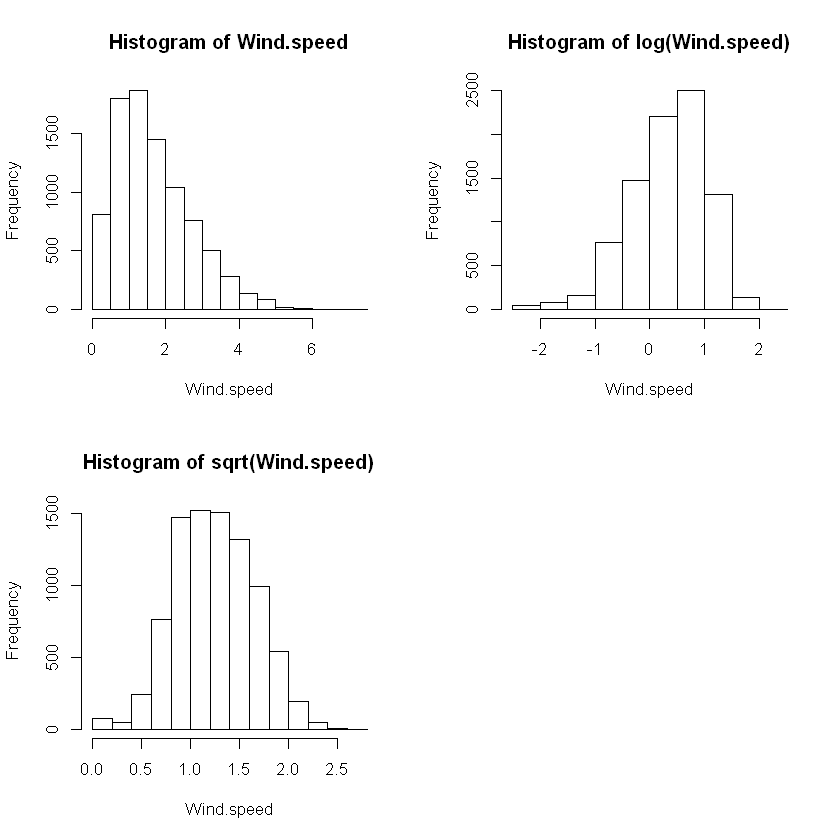

In [29]:
#variations of Wind.speed
par(mfrow = c(2,2))
hist(data$Wind.speed, xlab = "Wind.speed", main="Histogram of Wind.speed")
hist(log(data$Wind.speed), xlab = "Wind.speed", main="Histogram of log(Wind.speed)")
hist(sqrt(data$Wind.speed), xlab = "Wind.speed", main="Histogram of sqrt(Wind.speed)")


From the above figure we can see that the sqrt(Wind.speed) is the most normally distributed

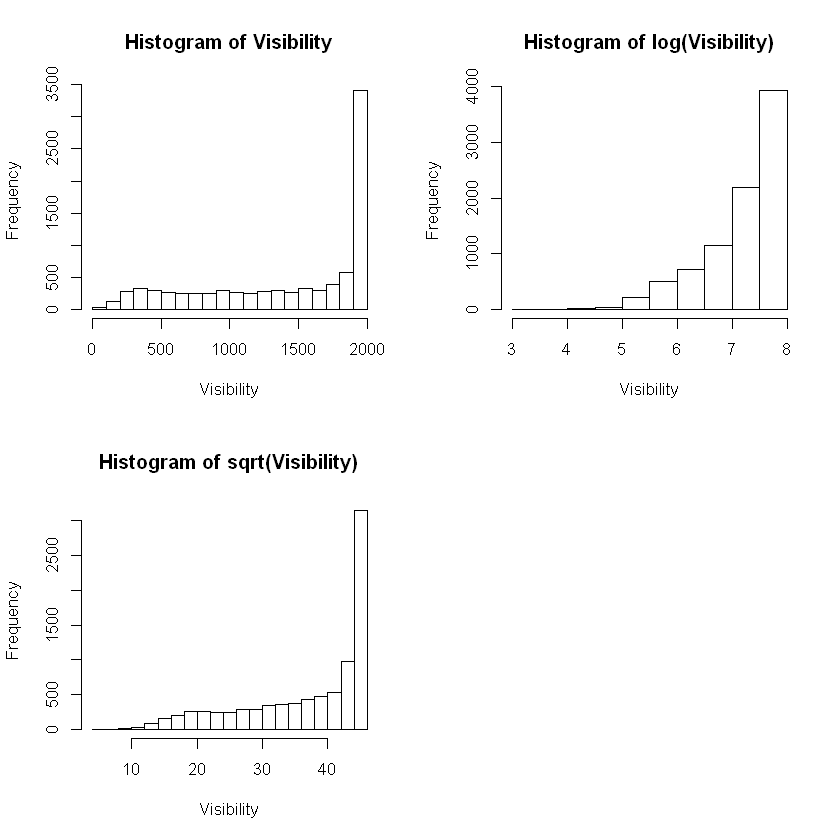

In [30]:
#variations of Visibility
par(mfrow = c(2,2))
hist(data$Visibility, xlab = "Visibility", main="Histogram of Visibility")
hist(log(data$Visibility), xlab = "Visibility", main="Histogram of log(Visibility)")
hist(sqrt(data$Visibility), xlab = "Visibility", main="Histogram of sqrt(Visibility)")


From the above figure we can see that the visibility column itself is the most normally distributed

Warning message in log(data$Dew.point.temperature):
"NaNs produced"Warning message in sqrt(data$Dew.point.temperature):
"NaNs produced"

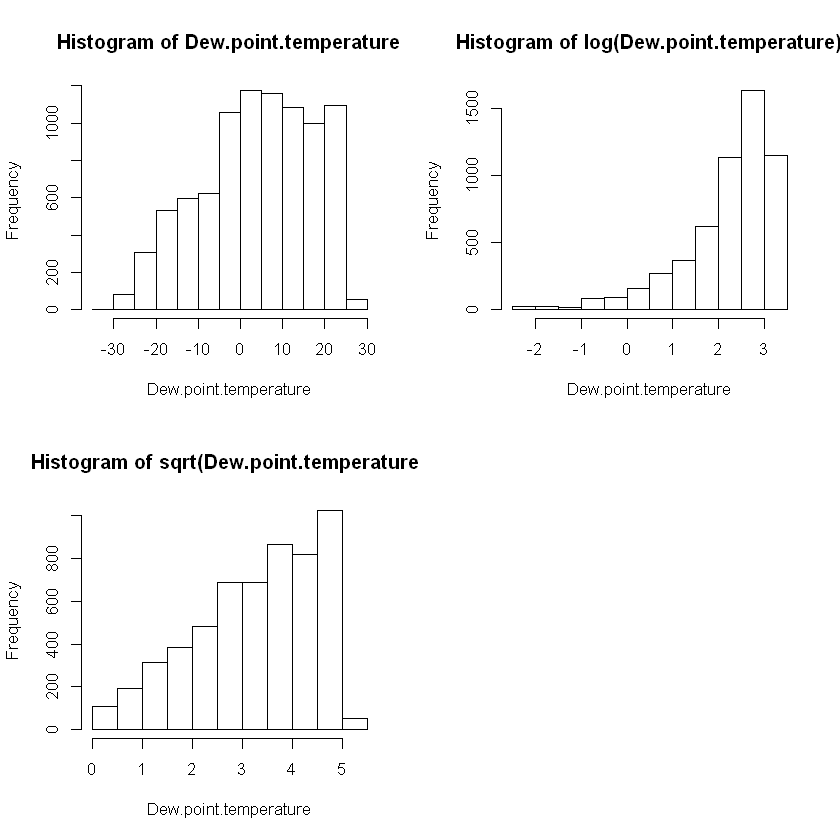

In [31]:
#variations of Dew.point.temperature
par(mfrow = c(2,2))
hist(data$Dew.point.temperature, xlab = "Dew.point.temperature", main="Histogram of Dew.point.temperature")
hist(log(data$Dew.point.temperature), xlab = "Dew.point.temperature", main="Histogram of log(Dew.point.temperature)")
hist(sqrt(data$Dew.point.temperature), xlab = "Dew.point.temperature", main="Histogram of sqrt(Dew.point.temperature)")


From the above figure we can see that the dew point temperature column itself is the most normally distributed

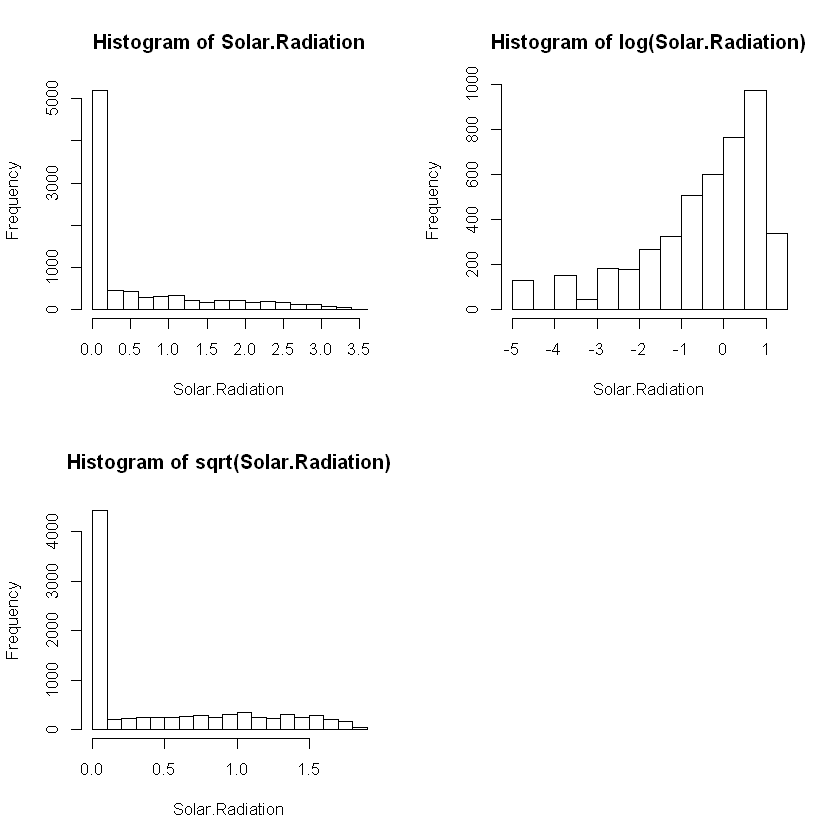

In [32]:
#variations of Solar.Radiation
par(mfrow = c(2,2))
hist(data$Solar.Radiation, xlab = "Solar.Radiation", main="Histogram of Solar.Radiation")
hist(log(data$Solar.Radiation), xlab = "Solar.Radiation", main="Histogram of log(Solar.Radiation)")
hist(sqrt(data$Solar.Radiation), xlab = "Solar.Radiation", main="Histogram of sqrt(Solar.Radiation)")


From the above figure we can see that the solar radiation column itself is the most normally distributed

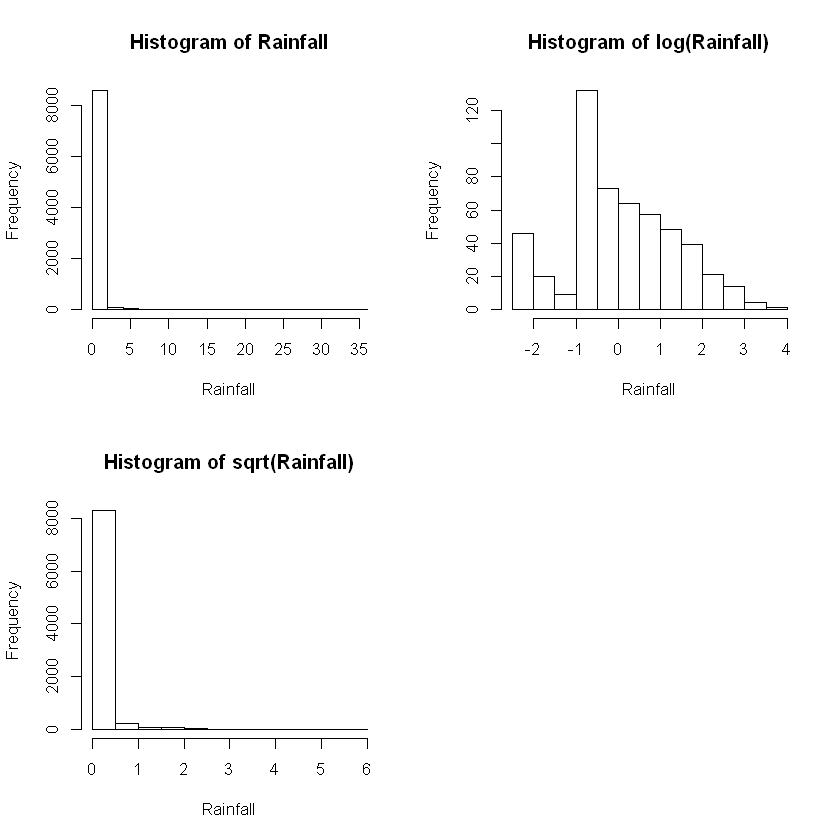

In [33]:
#variations of Rainfall
par(mfrow = c(2,2))
hist(data$Rainfall, xlab = "Rainfall", main="Histogram of Rainfall")
hist(log(data$Rainfall), xlab = "Rainfall", main="Histogram of log(Rainfall)")
hist(sqrt(data$Rainfall), xlab = "Rainfall", main="Histogram of sqrt(Rainfall)")


From the above figure we can see that the rainfall column itself is the considerably better

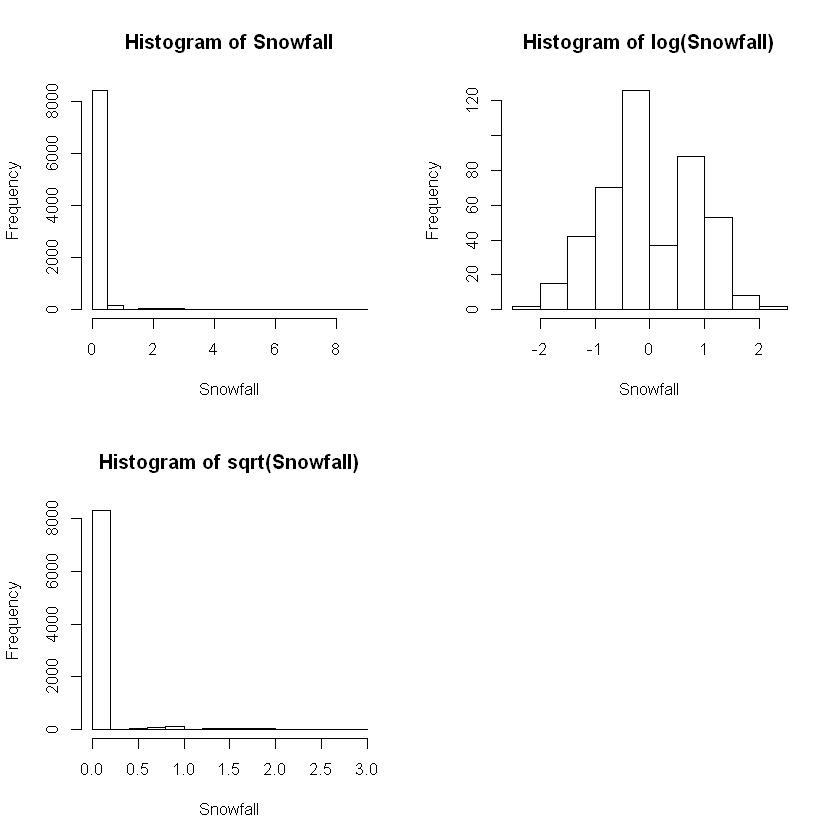

In [34]:
#variations of Snowfall
par(mfrow = c(2,2))
hist(data$Snowfall, xlab = "Snowfall", main="Histogram of Snowfall")
hist(log(data$Snowfall), xlab = "Snowfall", main="Histogram of log(Snowfall)")
hist(sqrt(data$Snowfall), xlab = "Snowfall", main="Histogram of sqrt(Snowfall)")


From the above figure we can see that log(Snowfall) is the most normally distributed

## 3. Model Selection

Now we need to generate models that will help us in predicting the value of Rented Bike Count. We can use different models like Linear Regression, Lasso, Ridge or Random Forest. However for this exercise we need to generate only two models. Hence we will create two models i.e. Linear Regression Model and Lasso Model. At the end we will compare the two models based on the error values in prediction i.e. the mean square error. The model which will give the least error will be considered as the best one. Also we generate the models on our training dataset and then use the generated model to predict values from the test dataset. 

### a) Linear Regression

A Linear Regression Model is created when the target variable is a numerical value. In our case the target variable is the Rented Bike Count which is numerical in nature. Hence we will plot a linear regression model and determine which predictors highly influence the target variable. 

To plot the linear regression models, we can first plot the model which will contain all the original predictors. This is represented by  . while creating lm

Hence a linear regression model is created below with target variable as Rented.Bike.Count and all the other columns as predictors. We will not give the Date column as a predictor here. 

Next to see the statistics of the mode, we will use the summary()


In [35]:
my_fit = lm(Rented.Bike.Count ~ ., data = data_train[,-1])
summary(my_fit)


Call:
lm(formula = Rented.Bike.Count ~ ., data = data_train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1204.19  -275.56   -57.05   210.84  2275.78 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -130.24305  109.13810  -1.193 0.232762    
Hour                    27.66370    0.82565  33.505  < 2e-16 ***
Temperature             16.47937    4.06326   4.056 5.05e-05 ***
Humidity               -10.46135    1.14121  -9.167  < 2e-16 ***
Wind.speed              20.62588    5.75048   3.587 0.000337 ***
Visibility               0.01414    0.01105   1.279 0.200831    
Dew.point.temperature   10.70582    4.25143   2.518 0.011819 *  
Solar.Radiation        -74.20932    8.52795  -8.702  < 2e-16 ***
Rainfall               -56.57131    4.62643 -12.228  < 2e-16 ***
Snowfall                38.55304   12.40459   3.108 0.001891 ** 
SeasonsSpring         -129.83141   15.52942  -8.360  < 2e-16 ***
SeasonsSummer         -143.26093 

The output contains: residuals, coefficients, residual standard error, $R^2$, and F-statistic. These are the statistics that we use to assess the accuracy of the model. 

Taking significance of 0.05 we can see the p values in the summary to see which predictors are the most significant to the target variable. Here we see that Visibility has a very less significance to the target variable and hence we can exclude it from the model.The lower the p value the better the predictor.  

We also saw from the above histograms created in Data Exploration, that sqrt(Wind.speed) and log(Snowfall + 1) had a much more normal distribution as compared to their respective columns indvidually. Hence we can also include these predictors in generating the new lm model. 



In [36]:
my_fit2 = lm(Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall+1), data = data_train[,-1])
summary(my_fit2)



Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall + 
    1), data = data_train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-1219.02  -273.43   -55.09   208.16  2276.48 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -319.55729  114.99508  -2.779  0.00547 ** 
Hour                    27.42767    0.82479  33.254  < 2e-16 ***
Temperature             17.15339    4.05601   4.229 2.38e-05 ***
Humidity               -10.23276    1.13970  -8.978  < 2e-16 ***
Wind.speed             -90.68824   22.54834  -4.022 5.83e-05 ***
Visibility               0.01513    0.01103   1.371  0.17027    
Dew.point.temperature    9.95266    4.24317   2.346  0.01903 *  
Solar.Radiation        -76.18692    8.51721  -8.945  < 2e-16 ***
Rainfall               -56.01160    4.61901 -12.126  < 2e-16 ***
Snowfall              -115.12738   47.71951  -2.413  0.01587 *  
SeasonsSpring         -133.08066   15.50659  -8.582  <

In the model above we see that p value of many predictors like Visibility, Dew.point.temperature and Snowfall is slightly high. Hence we can perform analysis on the interaction terms for these column to see whether they increase significance on the target variable. 

Also we see that for this model the Adjusted R square value increases which means the model is good. Along with this we also see a decrease in the Residual standard error. Hence including sqrt(Wind.speed) and log(Snowfall + 1) have increased the accuracy of the model.

Now we will create another model which excludes the Visibility and Date columns but also include the sqrt(Wind.speed) and log(Snowfall + 1) predictors. 

In [37]:
my_fit3 = lm(Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall+1), data = subset(data_train, select=c( -Date, -Visibility )))
summary(my_fit3)



Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall + 
    1), data = subset(data_train, select = c(-Date, -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1214.94  -273.82   -57.25   209.47  2269.63 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -266.7380   108.3610  -2.462 0.013857 *  
Hour                    27.3589     0.8233  33.230  < 2e-16 ***
Temperature             16.8680     4.0509   4.164 3.17e-05 ***
Humidity               -10.6264     1.1030  -9.634  < 2e-16 ***
Wind.speed             -88.9993    22.5161  -3.953 7.80e-05 ***
Dew.point.temperature   10.2685     4.2372   2.423 0.015400 *  
Solar.Radiation        -78.5677     8.3390  -9.422  < 2e-16 ***
Rainfall               -56.1869     4.6175 -12.168  < 2e-16 ***
Snowfall              -116.6140    47.7102  -2.444 0.014541 *  
SeasonsSpring         -137.7970    15.1214  -9.113  < 2e-16 ***
SeasonsSummer         -144.1514

In the model above we see that p value of many predictors like Visibility, Dew.point.temperature and Snowfall is still very high. Hence we can perform analysis on the interaction terms for these column to see whether they increase significance on the target variable. 

Also we see that for this model the Adjusted R square value remains the same. Along with this we also see a very small amount of increase in the Residual standard error. As  result we see a very similar model from abve and hence we should apply more analysis in creating the models.

Now we will create another model which excludes the Visibility and Date columns but will not include the sqrt(Wind.speed) and log(Snowfall + 1) predictors. We will then generate its summary to see the statistical values


In [38]:
my_fit4 = lm(Rented.Bike.Count ~ . , data = subset(data_train, select=c( -Date, -Visibility )))
summary(my_fit4)



Call:
lm(formula = Rented.Bike.Count ~ ., data = subset(data_train, 
    select = c(-Date, -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1212.92  -275.69   -58.41   211.29  2269.37 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -82.2037   102.4793  -0.802 0.422494    
Hour                    27.5979     0.8241  33.489  < 2e-16 ***
Temperature             16.2111     4.0580   3.995 6.54e-05 ***
Humidity               -10.8274     1.1048  -9.800  < 2e-16 ***
Wind.speed              21.3920     5.7195   3.740 0.000185 ***
Dew.point.temperature   10.9983     4.2455   2.591 0.009601 ** 
Solar.Radiation        -76.4338     8.3492  -9.155  < 2e-16 ***
Rainfall               -56.7399     4.6248 -12.269  < 2e-16 ***
Snowfall                38.1999    12.4021   3.080 0.002077 ** 
SeasonsSpring         -134.2700    15.1376  -8.870  < 2e-16 ***
SeasonsSummer         -141.9465    19.3765  -7.326 2.64e-13 ***
Season

In the model above we see that p value of many predictors like Dew.point.temperature and Snowfall has reduced hence they have become better predictors. Also we see that most of the predictors have a small p value and hence they show a high significance to the target variable.

Also we see that for this model the Adjusted R square value decreses slightly. Along with this we also see a very small amount of increase in the Residual standard error. Still we can not say that we have a better model, hence more analysis should be applied.

Now we will create another model which excludes the Visibility and Date columns but will not include the sqrt(Wind.speed) and log(Snowfall + 1) predictors. We have also used various other predictors as shown in below code on the basis of the p values generated in the above model. We have not used any interaction terms here yet as I wanted to see first how the model behaves using just sqrt and log predictors. We will then generate its summary to see the statistical values


In [39]:
my_fit5 = lm(Rented.Bike.Count ~ . +  sqrt(Humidity) + sqrt(Wind.speed)  + 
               sqrt(Solar.Radiation) + sqrt(Rainfall) + sqrt(Snowfall) +
                log(Humidity+1) + log(Wind.speed+1)  +  log(Snowfall + 1) +
              log(Solar.Radiation+1) + log(Rainfall+1)
             , data = subset(data_train, select=c( -Date , - Visibility)))
summary(my_fit5)



Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Humidity) + sqrt(Wind.speed) + 
    sqrt(Solar.Radiation) + sqrt(Rainfall) + sqrt(Snowfall) + 
    log(Humidity + 1) + log(Wind.speed + 1) + log(Snowfall + 
    1) + log(Solar.Radiation + 1) + log(Rainfall + 1), data = subset(data_train, 
    select = c(-Date, -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1233.06  -263.43   -51.81   215.33  2047.29 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1758.6290   144.4317 -12.176  < 2e-16 ***
Hour                        25.7007     0.7798  32.960  < 2e-16 ***
Temperature                100.8526     7.0909  14.223  < 2e-16 ***
Humidity                  -128.9721     9.3986 -13.722  < 2e-16 ***
Wind.speed                 -65.5777    21.3898  -3.066 0.002179 ** 
Dew.point.temperature      -82.7771     7.7264 -10.713  < 2e-16 ***
Solar.Radiation            -58.2381    44.5499  -1.307 0.191169    
Rainfall    

In the model above we see that p value of many predictors is less hence hence they have become better predictors. We also see some predictors with a high p value but this can be handled while creating the final lm model. However we see that that most of the predictors have a small p value and hence they show a high significance to the target variable.

Also we see that for this model the Adjusted R square value has increased significantly. Hence we can say that this model has performed better as compared to the above models. Along with this we also see a decrease in the Residual standard error. Hence the error has fallen down which means the model generated is better. 

Now we will create another model which excludes the Visibility and Date columns but will not include the sqrt(Wind.speed) and log(Snowfall + 1) predictors. We have also used various other predictors as shown in below code on the basis of the p values generated in the above model. Now I have included some interaction terms based on thie corelation. So Temperature and Dew.point.temperature have a positive corelation with the target variable and hence I have generated an interacton term between these two predictor. Also Temperature and Hour has a positive corelation with the target variable and so I have generated an interaction term of the two. I also saw a negative corelation of Humidity and Rainfall with the target variable and hence I have included an interaction term of these two as well. We will then generate its summary to see the statistical values


In [40]:
my_fit6 <-lm(Rented.Bike.Count ~ . +  sqrt(Wind.speed)  +  log(Snowfall + 1) +
          Temperature:Dew.point.temperature + Temperature:Hour + Humidity:Rainfall           
             , data = subset(data_train, select=c( -Date , - Visibility)))
summary(my_fit6)



Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall + 
    1) + Temperature:Dew.point.temperature + Temperature:Hour + 
    Humidity:Rainfall, data = subset(data_train, select = c(-Date, 
    -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1378.36  -243.53   -52.28   185.52  2067.16 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        1.763e+02  1.041e+02   1.694 0.090269 .  
Hour                               6.386e+00  1.061e+00   6.020 1.83e-09 ***
Temperature                       -1.031e+01  3.928e+00  -2.624 0.008714 ** 
Humidity                          -1.265e+01  1.062e+00 -11.906  < 2e-16 ***
Wind.speed                        -5.478e+01  2.118e+01  -2.586 0.009735 ** 
Dew.point.temperature              2.436e+01  4.152e+00   5.867 4.65e-09 ***
Solar.Radiation                   -8.081e+01  7.833e+00 -10.317  < 2e-16 ***
Rainfall                          

In the model above we see that p value of many predictors is less hence hence they have become better predictors. We see that that most of the predictors have a small p value and hence they show a high significance to the target variable.

Also we see that for this model the Adjusted R square value has decreases slightly and residual error has increased slightly. Hence we can still build a better model. 

Now we will create another model which excludes the Visibility and Date columns but will not include the sqrt(Wind.speed) and log(Snowfall + 1) predictors. We have also used various other predictors as shown in below code on the basis of the p values generated in the above model. Now I have included some interaction terms based on thie corelation. So Temperature and Dew.point.temperature have a positive corelation with the target variable and hence I have generated an interacton term between these two predictor. Also Temperature and Hour has a positive corelation with the target variable and so I have generated an interaction term of the two. I also saw a negative corelation of Humidity and Rainfall with the target variable and hence I have included an interaction term of these two as well. I also saw a relation between the p values of certain other predictors which have been used as interaction terms in the code below while creating the lm model. Hence I have included interaction terms like Humidity:Solar.Radiation (both had p value as < 2e-16 in above model), Dew.point.temperature:Hour (as both had p values in terms of e-09) and so on. Hence the final model created looks as shown below.


We will then generate its summary to see the statistical values


In [41]:
final_fit <-lm(Rented.Bike.Count ~ . +  sqrt(Wind.speed)  +  log(Snowfall + 1) +
          Temperature:Dew.point.temperature + Temperature:Hour + Humidity:Rainfall +
           Humidity:Solar.Radiation + sqrt(Wind.speed):Dew.point.temperature + 
          Wind.speed:Snowfall + Temperature:sqrt(Wind.speed) + Dew.point.temperature:Hour +
               Humidity:Dew.point.temperature + Dew.point.temperature:Solar.Radiation + log(Wind.speed + 1)
             , data = subset(data_train, select=c( -Date , - Visibility)))
summary(final_fit)






Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Snowfall + 
    1) + Temperature:Dew.point.temperature + Temperature:Hour + 
    Humidity:Rainfall + Humidity:Solar.Radiation + sqrt(Wind.speed):Dew.point.temperature + 
    Wind.speed:Snowfall + Temperature:sqrt(Wind.speed) + Dew.point.temperature:Hour + 
    Humidity:Dew.point.temperature + Dew.point.temperature:Solar.Radiation + 
    log(Wind.speed + 1), data = subset(data_train, select = c(-Date, 
    -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1502.47  -242.27   -54.87   174.38  1998.57 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -7.070e+01  1.364e+02  -0.518 0.604263
Hour                                   -9.716e+00  1.799e+00  -5.400 6.89e-08
Temperature                            -2.397e+01  7.107e+00  -3.373 0.000748
Humidity                               -5.277e+00  1.310e+00  -4.029 5.66e-05


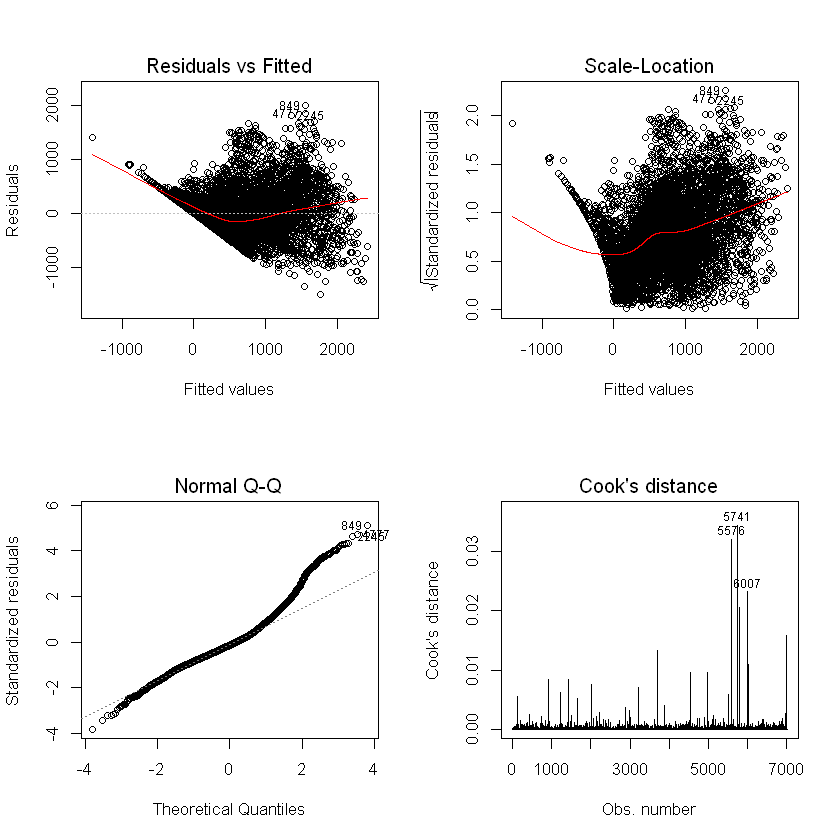

In [42]:
par(mfcol=c(2,2))
plot(final_fit, which = 1)
plot(final_fit, which = 2)
plot(final_fit, which = 3)
plot(final_fit, which = 4)

The diagnostic plots show residuals in four different ways.

1. The *residual vs fitted plot*: This plot is used to check the linear assumption. If there is an equal distribution around the horizontal line then we say that there is a linear relationship between the predictor and target variable. However if the data points are not spread evenly we say there is a non linear relationship. Here we see there is a non linear relationship.


* The normal *Q-Q plot*: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool which helps us assess if a set of data plausibly came from some theoretical distribution such as a Normal. The plot above will show whether the data points are distributed normally or not.  However we see that the residuals are not lying entirely on the straight line. 

* The *scale-location plot*: It is used to check if the residuals are lyinh on the horizontal line or not. This is used to check if they are residuals are spread randomly or not. We see that the residuals are spread randomly.


* The *residual-leverage plot*: it helps us identify influential data samples. We will have to check whether the outliers detected are influential points or not. Hence we need to focus only on the influential points as they will be useful while creating the model. In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. When samples are outside of the Cook’s distance the samples are influential to the regression results. 

In [43]:
outlierTest(final_fit, cutoff=0.05, digits = 1)

     rstudent unadjusted p-value Bonferroni p
849  5.117658         3.1761e-07    0.0022258
4777 4.732489         2.2615e-06    0.0158490
2245 4.646360         3.4404e-06    0.0241100

Hence 849,4777,2245 are not outliers

Next I have used the step function on the final created model to see if there will be any increased significance. 

In [44]:
step_final <- step(final_fit)
summary(step_final)

Start:  AIC=83703.67
Rented.Bike.Count ~ Hour + Temperature + Humidity + Wind.speed + 
    Dew.point.temperature + Solar.Radiation + Rainfall + Snowfall + 
    Seasons + Holiday + Functioning.Day + sqrt(Wind.speed) + 
    log(Snowfall + 1) + Temperature:Dew.point.temperature + Temperature:Hour + 
    Humidity:Rainfall + Humidity:Solar.Radiation + sqrt(Wind.speed):Dew.point.temperature + 
    Wind.speed:Snowfall + Temperature:sqrt(Wind.speed) + Dew.point.temperature:Hour + 
    Humidity:Dew.point.temperature + Dew.point.temperature:Solar.Radiation + 
    log(Wind.speed + 1)

                                         Df Sum of Sq        RSS   AIC
- Wind.speed:Snowfall                     1    130451 1070339038 83703
<none>                                                1070208587 83704
- Temperature:Dew.point.temperature       1    403412 1070611999 83704
- Dew.point.temperature:sqrt(Wind.speed)  1    833094 1071041681 83707
- log(Wind.speed + 1)                     1   1270361 1071478948


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Humidity + 
    Wind.speed + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Seasons + Holiday + Functioning.Day + sqrt(Wind.speed) + 
    log(Snowfall + 1) + log(Wind.speed + 1) + Temperature:Dew.point.temperature + 
    Hour:Temperature + Humidity:Rainfall + Humidity:Solar.Radiation + 
    Dew.point.temperature:sqrt(Wind.speed) + Temperature:sqrt(Wind.speed) + 
    Hour:Dew.point.temperature + Humidity:Dew.point.temperature + 
    Dew.point.temperature:Solar.Radiation, data = subset(data_train, 
    select = c(-Date, -Visibility)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1502.04  -241.62   -55.04   173.78  1998.98 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -7.174e+01  1.364e+02  -0.526 0.598920
Hour                                   -9.772e+00  1.798e+00  -5.434 5.70e-08
Temperature              

The above model has performed 2 iterations until it achieves a low AIC value. After the secnd iteration we see that AIC value was not reducing by a high margin and hence the step function has stopped. Here we see that the residual error and adjusted R square values are similar as compared to the final_fit model. Hence we can use the final_fit model as the final lm model.


Now we use the anova() to compare the most suitable models. This will help us to compare the p values as the F values of the models. 

From the anova table we see that for the final_fit model the p value has reduced which hence shows that it hs a high significance towards the target variable as compared to the rest of the models. Also considering the F value we see that the F value is best for our final model hence we cn say that out of all the models generated, the final_fit is the best one

In [45]:
anova(my_fit5,my_fit6,final_fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6984,1141019154,NA,NA,NA,NA
6989,1155521965,-5,-14502811,18.92045,9.753507e-19
6981,1070208587,8,85313378,69.56269,1.559187e-110


Now to predict the values of the target variable by using our final_fit model we will use the predict()

We will give the final model and the test dat to generate the predicted values. We will then subtract these predicted values from the actual values and then calculate the mean of their squares to finally get the Mean Square Error (MSE). The lower the MSE the better the model was in prediction tasks.

In [46]:
mean((predict(final_fit,data_test) - data_test$Rented.Bike.Count)^2)

[1] 148051

## Regularization and reg subset selection

Now we will do regularizaton and subset selection known as stepwise selection, which explore a far more restricted set of models. The two techniques used are - 
* Forward stepwise selection : Starts with one-variable models, gradually add one variable, end with a model including all the specified variables.
* Backward stepwise selection : Starts with a full model, gradually exclude one variable, end with one-variable models.

In [47]:
# regfit.full <- regsubsets(Rented.Bike.Count ~ . , data = data[-1], nvmax = 15)

In [48]:
reg_forward <- regsubsets(Rented.Bike.Count ~ ., data = data[-1], nvmax = 15, method = "forward")
reg_forward_summary <- summary(reg_forward)

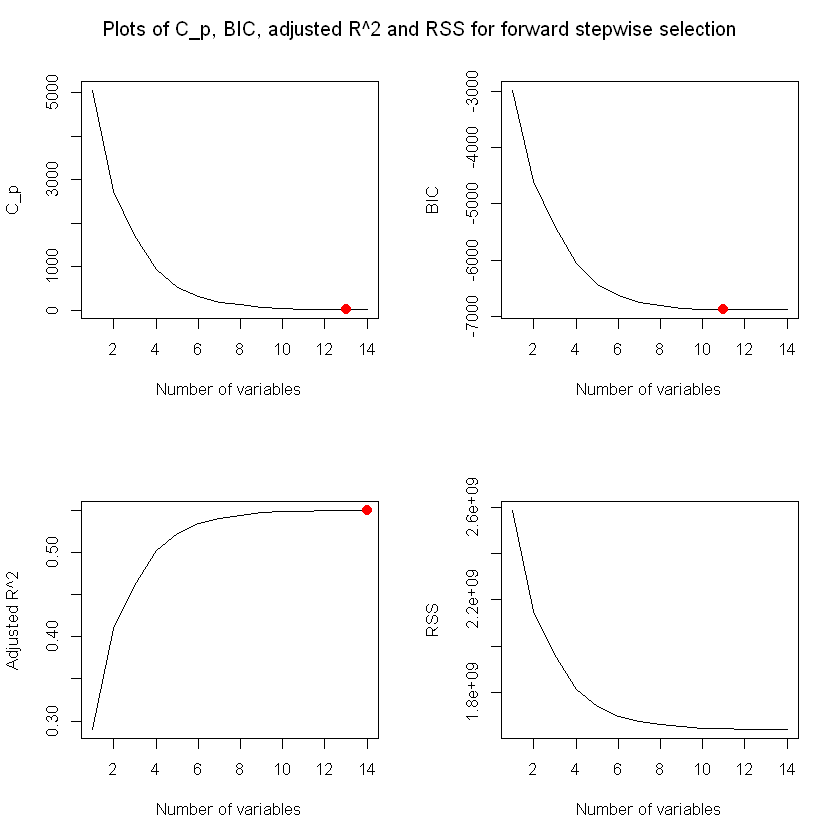

In [49]:
par(mfrow = c(2, 2))
plot(reg_forward_summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg_forward_summary$cp), reg_forward_summary$cp[which.min(reg_forward_summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg_forward_summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg_forward_summary$bic), reg_forward_summary$bic[which.min(reg_forward_summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg_forward_summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg_forward_summary$adjr2), reg_forward_summary$adjr2[which.max(reg_forward_summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg_forward_summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

In [50]:
reg_backward <- regsubsets(Rented.Bike.Count ~ ., data = data[-1], nvmax = 15, method = "backward")
reg_backward_summary <- summary(reg_backward)

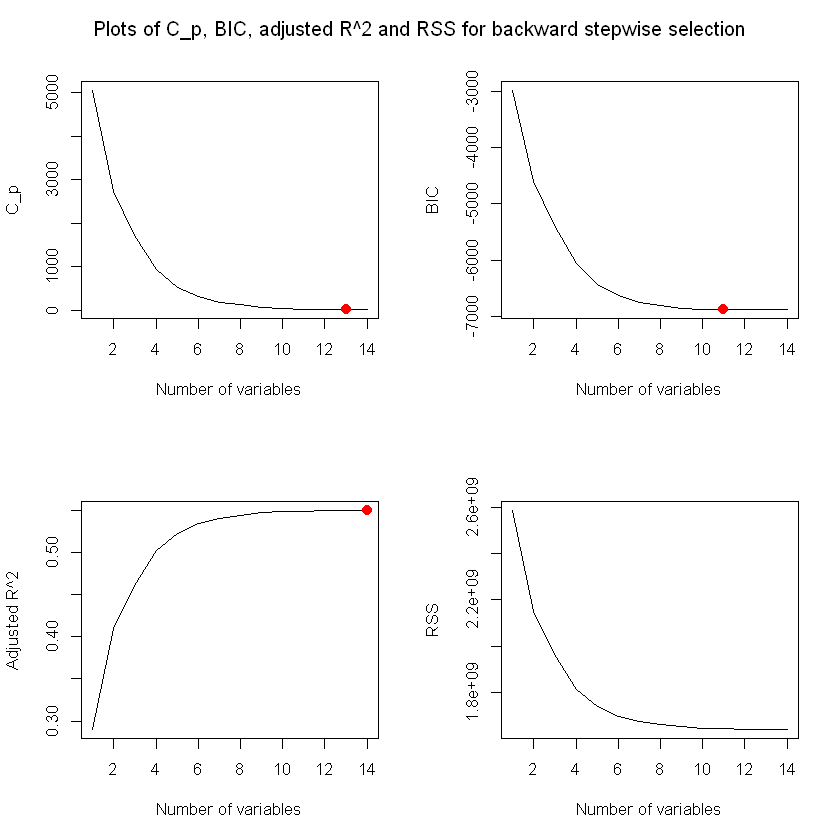

In [51]:
par(mfrow = c(2, 2))
plot(reg_backward_summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg_backward_summary$cp), reg_backward_summary$cp[which.min(reg_backward_summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg_backward_summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg_backward_summary$bic), reg_backward_summary$bic[which.min(reg_backward_summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg_backward_summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg_backward_summary$adjr2), reg_backward_summary$adjr2[which.max(reg_backward_summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg_backward_summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

### b) Lasso

In the lasso model creation we will first generate the model on all the original predictors as shown below.

The Lasso approach is used in Machine Learning process to do feature selection automatically. Depending on the shrinkage parameter, Lasso regularizes the coefficient in a way such that the estimated coefficients can be shrunk toward zero. Here we will use glmnet().


In [52]:
#parameters original
train.mat <- model.matrix(Rented.Bike.Count ~ . , data = data_train[-1])[,-1]
test.mat <- model.matrix(Rented.Bike.Count ~ . , data = data_test[-1])[,-1]
grid <- 10^seq(4, -2, length = 100)



In [53]:
fit.lasso <- glmnet(train.mat, data_train$Rented.Bike.Count, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, data_train$Rented.Bike.Count, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso


[1] 0.1417474

Hence the best lambda value for lasso generated is approximately 0.06136

In [54]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - data_test$Rented.Bike.Count)^2)

[1] 183234.5

Hence the MSE when Lasso is used on all original parameters comes out to be 183220.517 approximately. This is high as compared to the lm model.

Now we will generate a Lasso model based on the parameters used in final_fit lm model.

In [55]:
#parameters of final_fit
train.mat <- model.matrix(Rented.Bike.Count ~ . +  sqrt(Wind.speed)  +  log(Snowfall + 1) +
          Temperature:Dew.point.temperature + Temperature:Hour + Humidity:Rainfall +
           Humidity:Solar.Radiation + sqrt(Wind.speed):Dew.point.temperature + 
          Wind.speed:Snowfall + Temperature:sqrt(Wind.speed) + Dew.point.temperature:Hour +
               Humidity:Dew.point.temperature + Dew.point.temperature:Solar.Radiation + log(Wind.speed + 1), data = data_train[-1])[,-1]
test.mat <- model.matrix(Rented.Bike.Count ~ . +  sqrt(Wind.speed)  +  log(Snowfall + 1) +
          Temperature:Dew.point.temperature + Temperature:Hour + Humidity:Rainfall +
           Humidity:Solar.Radiation + sqrt(Wind.speed):Dew.point.temperature + 
          Wind.speed:Snowfall + Temperature:sqrt(Wind.speed) + Dew.point.temperature:Hour +
               Humidity:Dew.point.temperature + Dew.point.temperature:Solar.Radiation + log(Wind.speed + 1) , data = data_test[-1])[,-1]
grid <- 10^seq(4, -2, length = 100)

In [56]:
fit.lasso <- glmnet(train.mat, data_train$Rented.Bike.Count, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, data_train$Rented.Bike.Count, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

Warning message:
"from glmnet Fortran code (error code -86); Convergence for 86th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -86); Convergence for 86th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -85); Convergence for 85th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -83); Convergence for 83th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -86); Convergence for 86th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"Warning message:
"from glmnet Fortran code (error code -86); Convergence for 86th lambda value not reached after maxit=1

[1] 0.1417474

Hence the best lambda value for lasso generated is approximately 0.14175

In [57]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - data_test$Rented.Bike.Count)^2)

[1] 148112.9

Hence the MSE when Lasso is used on relevant parameters comes out to be 148112.926 approximately. This is very less as compared to the above Lasso model and similar to the lm model. 

Hence comparing the final lm and Lasso models we get that the lm model is better as it has a less MSE value. 


## Conclusion

As compared from the MSE values we can say that lm model is better. The final model was generated after applying certain interaction terms and new predictors to the original mode. Hence the linear regression model generated was better.


## References
References have been taken from the tutorial and stackoverflow.com